In [1]:
import numpy as np
import pandas as pd

In [2]:
from utils import load_airtable, load_table_as_df # for data loading 
from utils import plot_coded_column, DEFAULT_COLOR, DEFAULT_SIZE # for visualizations

# What is in DAO constitutions?
This notebook visualizes data collected in [Metagov's](https://metagov.org/) [Govbase](https://govbase.metagov.org/) database. The data set contains coded data describing the content and structure of 19+ governance documents for Web3 organization.

For the full writeup and resulting constitutional guide and template, check out the [Constitutions of Web3 website](https://constitutions.metagov.org/).

## Import coded data from Govbase
Import [Constitutional Model table](https://airtable.com/shrgnUrj0dqzZDsOd/tbltBIhUFqZE1tfle) and link related project information from the [Projects table](https://airtable.com/shrgnUrj0dqzZDsOd/tblvk3EFzcoCFvXXi/viwh2YRhXF7Xq54mm).

In [3]:
# Load DAO constitutions data from Constitutional Model table in Govbase
at = load_airtable()
df = load_table_as_df(at, 'Constitutional Model')

,systid,maintainer_notes,date_inforce,organization,date_promulgated,document_referenced,year,langscre,doctit,values_location,...,maintainer,rights_coded,values_coded,onchain,systyear,rights_comment,rightsw,goals_comment,orgstruct_comment,model_source
id,,,,,,,,,,,,,,,,,,,,,
rec0CpzAqXOWzeSXd,BrightDAO,"<airtable:mention id=""menYAfTtnffWcTatv"">@Josh...",2021-07-09,[recxDKbhLBbsLOCPH],2021-07-09,[rec1btwRnktNSaWBL],2021.0,1 - English,[Charter],Our Values\n,...,"[{'id': 'usrgENXWVY04S1HCC', 'email': 'josh@me...","[Privacy, Make proposal, Dispute/challenge pro...",[Inclusive],[recTLikaQcam7XT6J],2021,NaN,NaN,NaN,NaN,NaN
rec56oukU9wISkXq7,Q,Document is mostly focused on outlining techni...,NaN,[recucjzMZZTv80pUG],2023-05-13,[recd12R4RY2cLCe7K],2023.0,1 - English,[Constitution],N/A\n,...,"[{'id': 'usrqxOFTs5QWi5CuY', 'email': 'ann.bro...",[Make proposal],NaN,[rectCyA8LxFPDzQW0],2023,Don't have an explicit rights section,1. incorporated into various parts of the cons...,NaN,NaN,NaN
recBoMx85aA1bDeB3,Agave,"<airtable:mention id=""menrK96h03JjEM8Ry"">@Max ...",NaN,[recBQhrWUj6aRafjJ],2021-08-27,[recQfZA0N3WSohcVk],2021.0,1 - English,[Community Covenant],Copied from 1Hive covenant template\n,...,"[{'id': 'usrTqy1TaJqG1ZCQO', 'email': 'maxnz@m...","[Make proposal, Dispute/challenge proposal, Ha...","[Open, Free, Inclusive]",[recpnVuaGssc3G05f],2021,None,NaN,None in the covenant\n,NaN,NaN
recEzwLsqKUzPR8mN,EffectDAO,"<airtable:mention id=""menw5CU5cNSs4ypMF"">@Anna...",NaN,[recV0iEU38OM4wWCf],2020-08-24,[rec0y95bb5MCrQbNT],2021.0,1 - English,[Constitution],Core Principles\n,...,"[{'id': 'usri2meuD1yZ3axhU', 'email': 'anna.we...","[Make proposal, Vote, Veto]","[Inclusive, Open]",[reclIcPQWmYTKCO5P],2020,Rights are distributed differentially accordin...,2. included as a separate heading in the const...,Interesting how objectives/goals and principle...,NaN,NaN
recFbFftd4moXZwiz,Juno,Very short constitution,2022-12-02,[recmldJljxzlXjbi5],2022-12-02,[recDTmD1NhOQQxDam],NaN,1 - English,[Constitution],N/A\n,...,"[{'id': 'usrqxOFTs5QWi5CuY', 'email': 'ann.bro...",NaN,NaN,[reczYlYGU50QsCUef],2022,Rights are not explicitly stated,NaN,NaN,NaN,NaN
recIDgDDqAVlmT0Y3,Cold Truth,"<airtable:mention id=""menMtfxmtma7WJfwi"">@Max ...",NaN,[rec5CMHT3zeUFUEk2],2021-09-15,[recfS82zWZXfW1HRh],2021.0,1 - English,[Community Covenant],None\t\n,...,"[{'id': 'usrTqy1TaJqG1ZCQO', 'email': 'maxnz@m...","[Make proposal, Dispute/challenge proposal, Ha...","[Open, Free, Inclusive]",[recpnVuaGssc3G05f],2021,Copied from 1hive,NaN,Note that Cold Truth just adopted the 1Hive co...,NaN,NaN
recJbuQK51WMzpaxB,Cardano Ecosystem,NaN,2024-01-01,[recn9sfWqzZokQWSc],2024-12-31,[recMBr4uKAEo5eaPj],2023.0,1 - English,[Constitution],1. Article I [Cardano Blockchain Ecosystem Pri...,...,"[{'id': 'usrqxOFTs5QWi5CuY', 'email': 'ann.bro...",[Vote],"[Open, Inclusive]",NaN,2024,NaN,98. Not Specified,goals are not explicitly stated in a section \n,NaN,NaN
recMEqy0e1UmChMbA,MetaCartel Ventures,"<airtable:mention id=""menYBcmOwKTQ3yhq6"">@Max ...",NaN,[reciMANPu6sjR2hjY],2020-04-02,"[recKgdN6tYzyj3eXp, recung235f0XbQGgZ]",NaN,1 - English,"[Manifesto, Lore]",Unclear\n,...,"[{'id': 'usrTqy1TaJqG1ZCQO', 'email': 'maxnz@m...",NaN,[Open],[recD1RAkPtbu5JWo5],2020,NaN,NaN,NaN,NaN,NaN
recMxj49YAjP0a272,Giveth DAO,"<airtable:mention id=""menWYLCPm4FidFWJc"">@Max ...",NaN,[recbzpvVygjncRp89],2021-12-22,[rec2iTNH7xFkzbvxU],2021.0,1 - English,[Community Covenant],The values are referenced in the Giveth introd...,...,"[{'id': 'usrTqy1TaJqG1ZCQO', 'email': 'maxnz@m...",NaN,[Decentralization],NaN,2021,"No explicit rights stated. There is, however, ...",NaN,This is unusual in its emphasis on building a ...,Technically they call themselves a 'Decentrali...,NaN


In [4]:
# Load DAO ecosystem projects table to look up the DAO on-chain component project names
df_projects = load_table_as_df(at, 'Projects')
df['onchain'] = df['onchain'].apply(
    lambda values: [df_projects.at[v, 'Project name'] for v in values] if isinstance(values, list) else np.nan)


## Visualize what's in the constitutions

### Document structure

/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

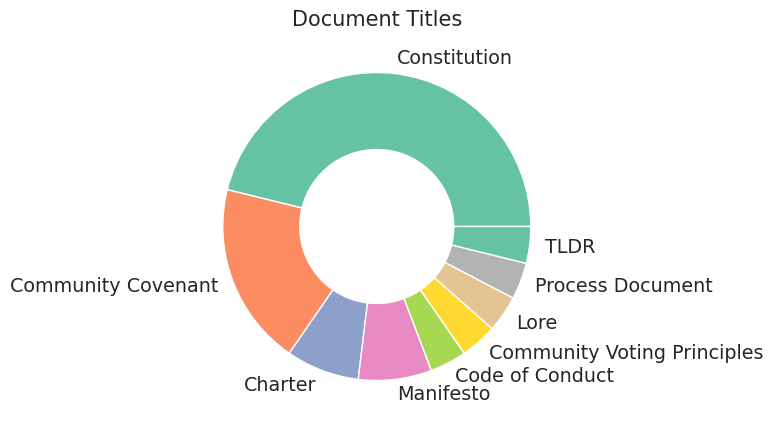

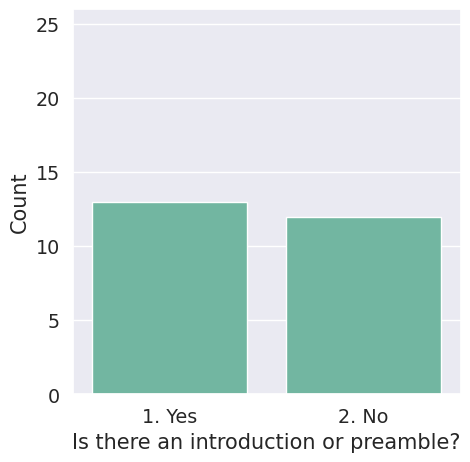

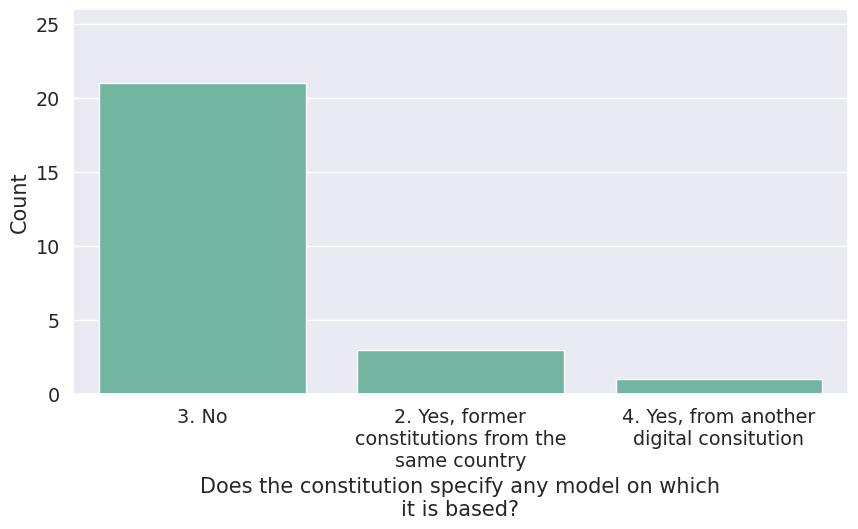

In [18]:
plot_coded_column(df, 'doctit', label='Document Titles', plotType='pie')
plot_coded_column(df, 'preamble', label='Is there an introduction or preamble?', orient='v')
plot_coded_column(df, 'model', label='Does the constitution specify any model on which it is based?', orient='v', size=(10,5))

### Rights, values, and goals

/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

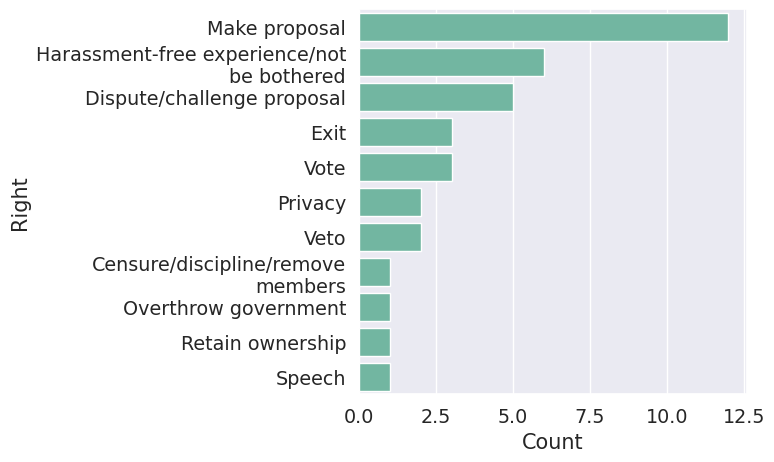

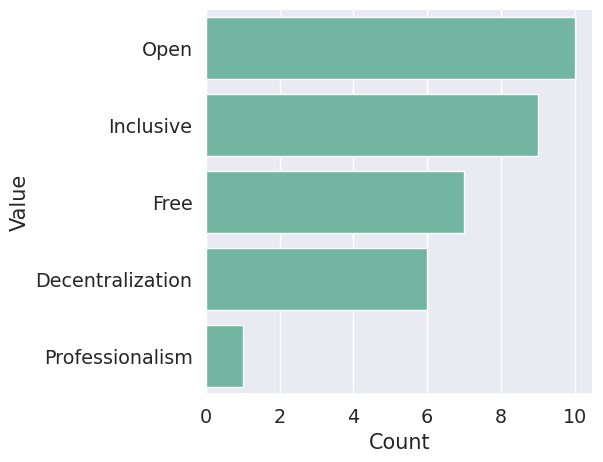

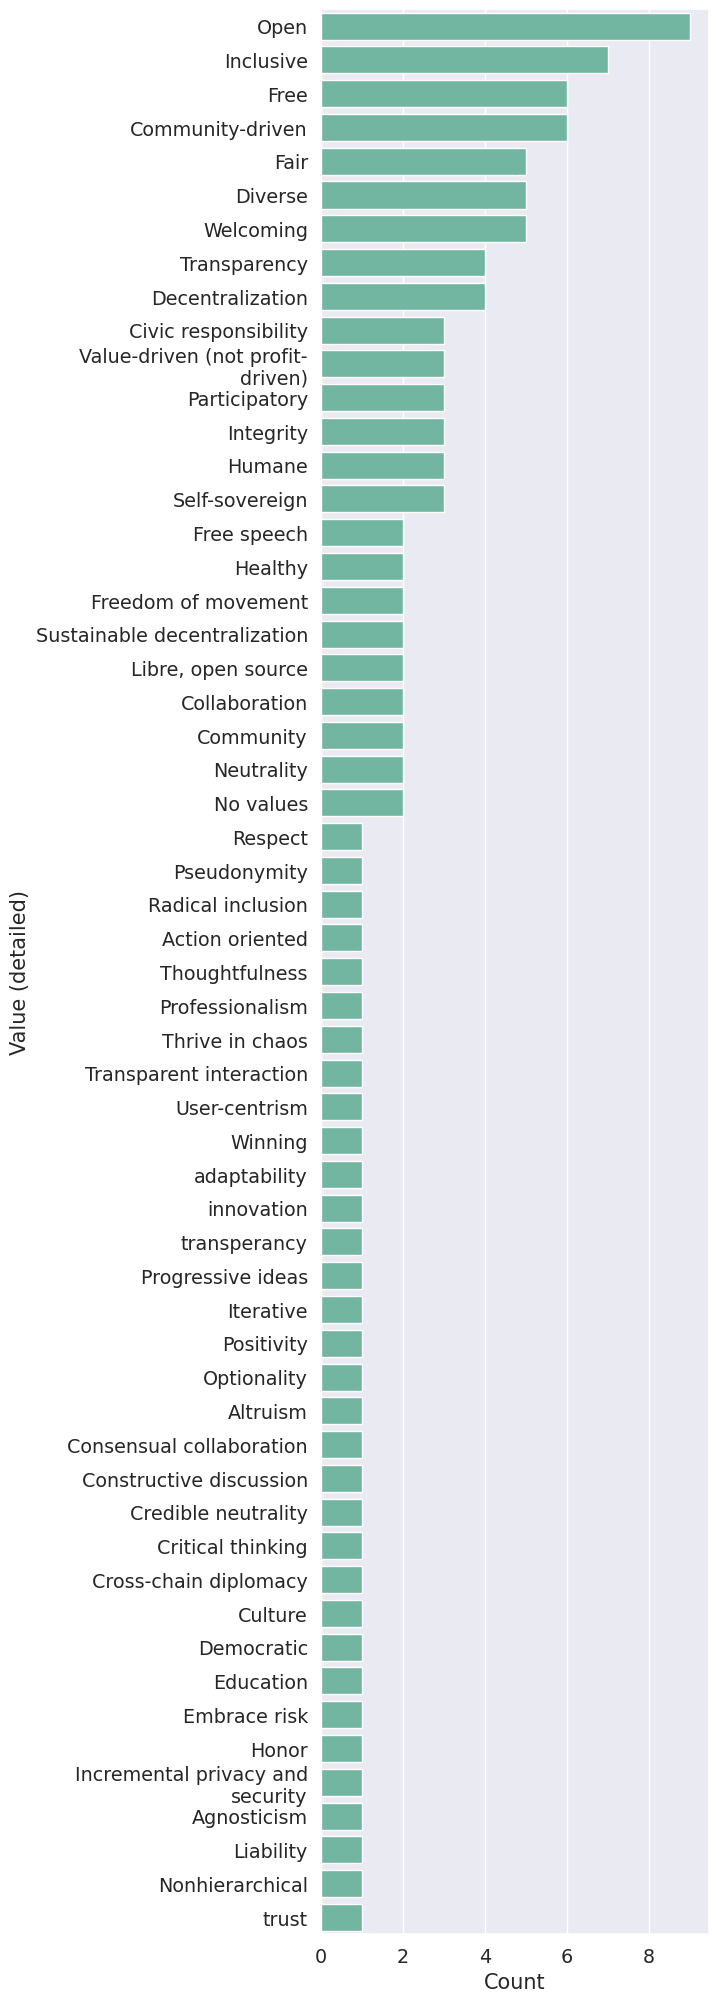

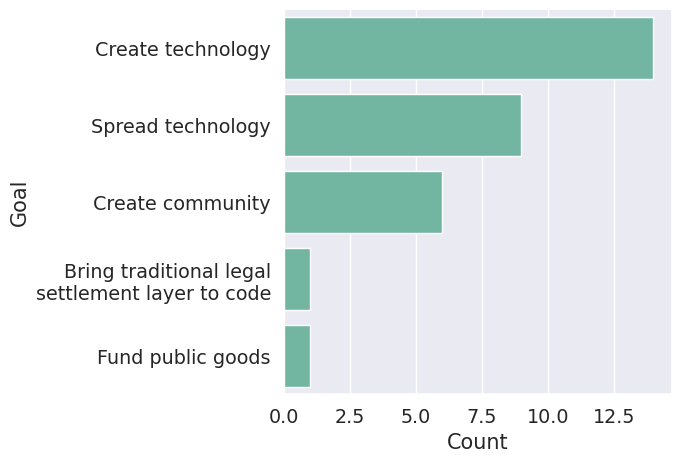

In [13]:
plot_coded_column(df, 'rights_coded', label='Right')
plot_coded_column(df, 'values_coded', label='Value')
plot_coded_column(df, 'values', label='Value (detailed)', size=(5,25))
plot_coded_column(df, 'goals_coded', label='Goal')

### Constitutional provisions

/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

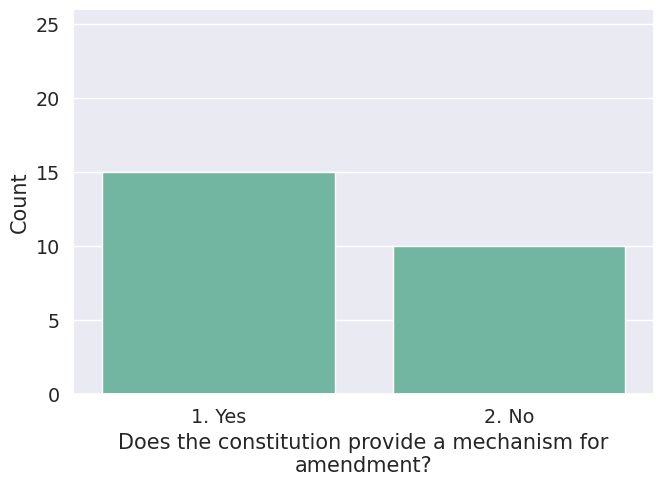

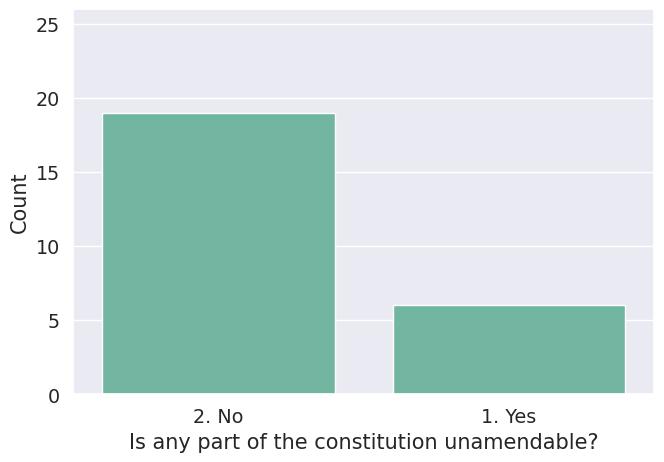

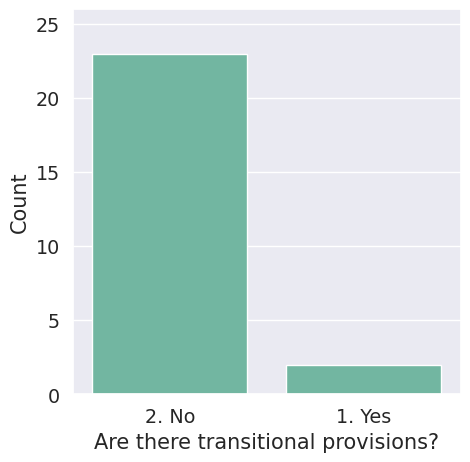

In [16]:
plot_coded_column(df, 'amend', label='Does the constitution provide a mechanism for amendment?', orient='v', size=(7.5,5))
plot_coded_column(df, 'unamend', label='Is any part of the constitution unamendable?', orient='v', size=(7.5,5))
plot_coded_column(df, 'transprov', label='Are there transitional provisions?', orient='v')

## Supplementary information
Not specified in constitution; drawn from other sources.

/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/notchia/.venv/constitutions/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

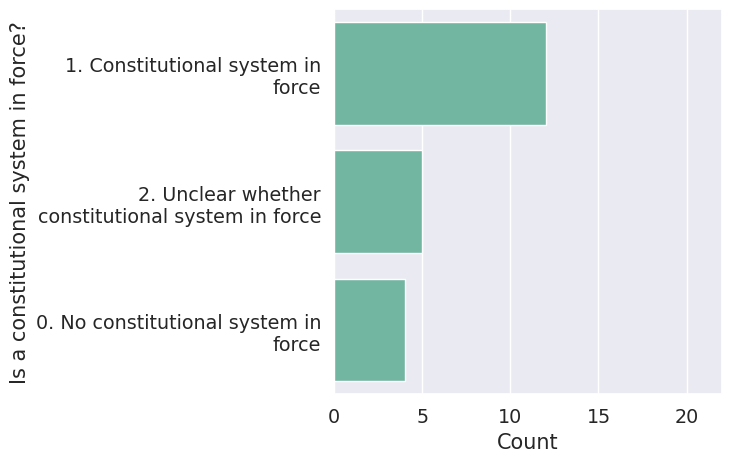

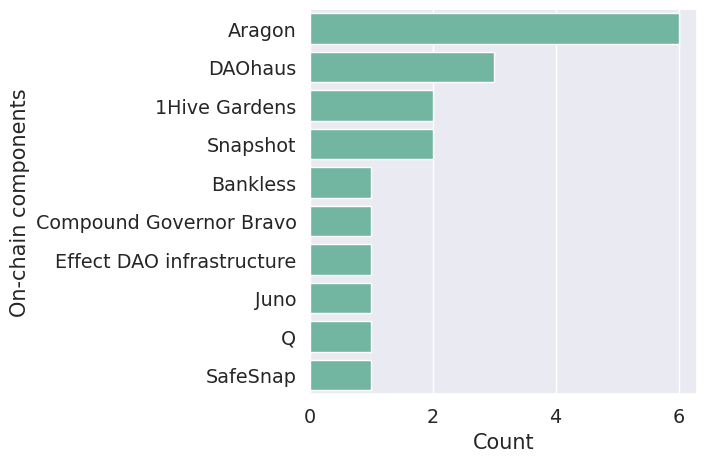

In [8]:
plot_coded_column(df, 'c_inforce', label='Is a constitutional system in force?')
plot_coded_column(df, 'onchain', label='On-chain components')